### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [274]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [275]:
df_data= pd.read_csv('Data.csv')
df_item = pd.read_csv('item.csv')
df_user=pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [276]:
#For Data file
print("******************************************************************")
print('Shape of data file is => ',df_data.shape)
print("******************************************************************")
print('Missing Values in  data file is below ')
print(df_data.isnull().sum())
print("******************************************************************")
print(df_data.info())
print("******************************************************************")
print(df_data.describe())

******************************************************************
Shape of data file is =>  (100000, 4)
******************************************************************
Missing Values in  data file is below 
user id      0
movie id     0
rating       0
timestamp    0
dtype: int64
******************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None
******************************************************************
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000

In [16]:
#For Item file
print("******************************************************************")
print('Shape of item file is => ',df_item.shape)
print("******************************************************************")
print('Missing Values in  item file is below ')
print(df_item.isnull().sum())
print("******************************************************************")
print(df_item.info())
print("******************************************************************")
print(df_item.describe())

******************************************************************
Shape of item file is =>  (1681, 22)
******************************************************************
Missing Values in  item file is below 
movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64
******************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-

In [17]:
#For user file
print("******************************************************************")
print('Shape of item file is => ',df_user.shape)
print("******************************************************************")
print('Missing Values in  user file is below ')
print(df_user.isnull().sum())
print("******************************************************************")
print(df_user.info())
print("******************************************************************")
print(df_user.describe())

******************************************************************
Shape of item file is =>  (943, 5)
******************************************************************
Missing Values in  user file is below 
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64
******************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
******************************************************************
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.0000

#### 4. Find the number of movies per genre using the item data - 5 marks

In [277]:
# use sum on the default axis
df_item.head()
#df_item['Action'].sum()
df_movieBasedGenre =df_item.drop(['movie id','movie title','release date'],axis=1)
df_movieBasedGenre.sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [278]:
#hint: use sum on the axis = 1
df_movie_greaterThan1Genre = df_item.drop(['movie id'],axis=1)
df_movie_greaterThan1Genre[df_movie_greaterThan1Genre.sum(axis=1)>1]

,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1668,Tainted,01-Feb-1998,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1671,Mirage,01-Jan-1995,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [279]:
dfmovie_withoutUnknownGenre= df_movie_greaterThan1Genre[~(df_movie_greaterThan1Genre['unknown']==1)]
print('shape of dataset without uknown movie genre is => ',dfmovie_withoutUnknownGenre.shape)
print(df_movie_greaterThan1Genre[df_movie_greaterThan1Genre['unknown']==1])

shape of dataset without uknown movie genre is =>  (1680, 21)
        movie title release date  unknown  Action  Adventure  Animation  \
1371  Good Morning    4-Feb-1971        1       0          0          0   

      Childrens  Comedy  Crime  Documentary  ...  Fantasy  Film-Noir  Horror  \
1371          0       0      0            0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1371        0        0        0       0         0    0        0  

[1 rows x 21 columns]


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

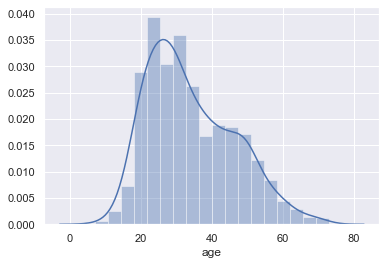

In [280]:

sns.distplot(df_user['age'])
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

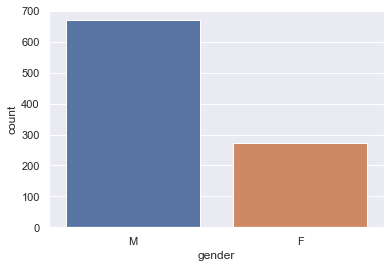

In [67]:
sns.set(style="darkgrid")
sns.countplot(x="gender", data=df_user)

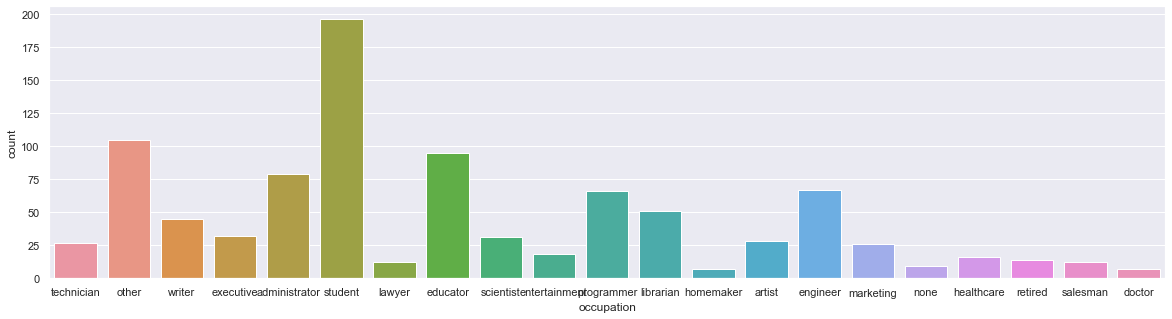

In [281]:
plt.figure(figsize=(20,5))
#sns.set(style="darkgrid")
sns.countplot(x="occupation", data=df_user)

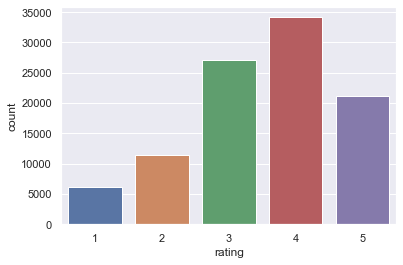

In [282]:
#df_data.columns
sns.countplot(x="rating", data=df_data)

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

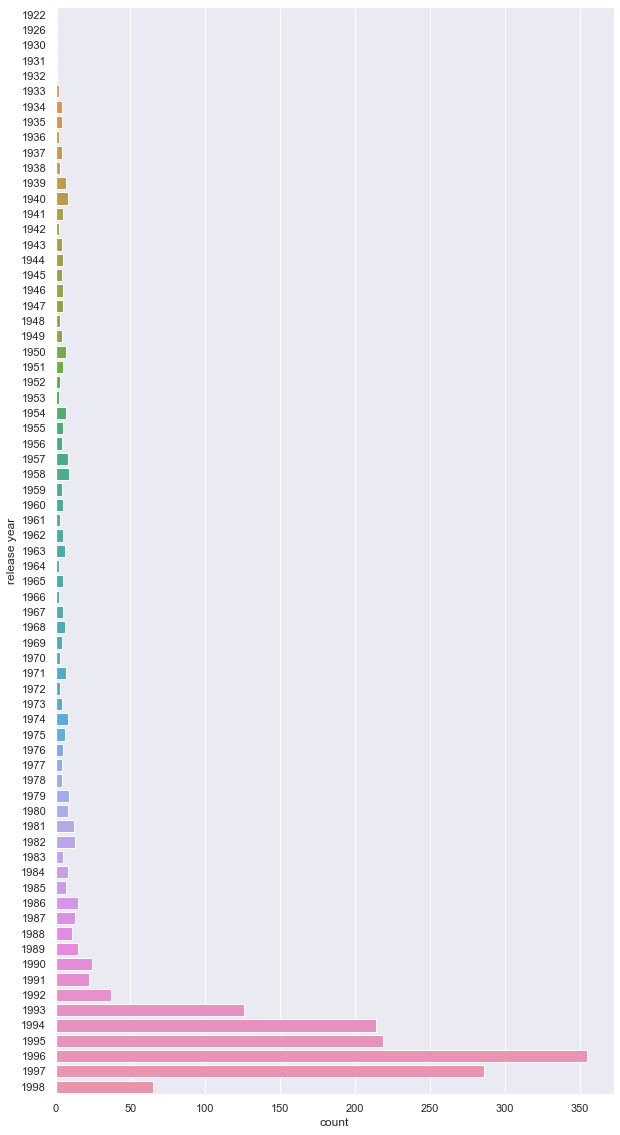

In [283]:
#your answers here
df_item['release year'] =df_item['release date'].apply(lambda x: x.split('-')[2])
plt.figure(figsize=(10,20))
sns.countplot(y="release year", data=df_item)

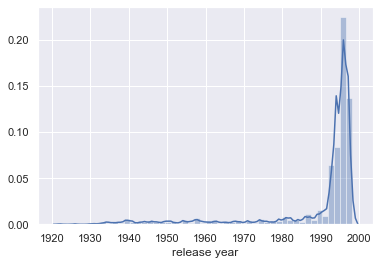

In [285]:
sns.distplot(df_item['release year'].astype(int))

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [286]:
#Your answer here
df_itemwithoutID=df_item.drop(['movie id','movie title','release date'],axis=1)
dfpopularityGenre =df_itemwithoutID.groupby('release year').sum()

In [289]:
print(dfpopularityGenre.max().sort_values(ascending=False))


Drama          170
Comedy         108
Thriller        54
Romance         51
Action          46
Crime           30
Adventure       24
Childrens       22
Mystery         18
Documentary     18
Sci-Fi          15
Horror          14
War             14
Musical          9
Animation        9
Western          6
Fantasy          6
Film-Noir        2
unknown          1
dtype: int64


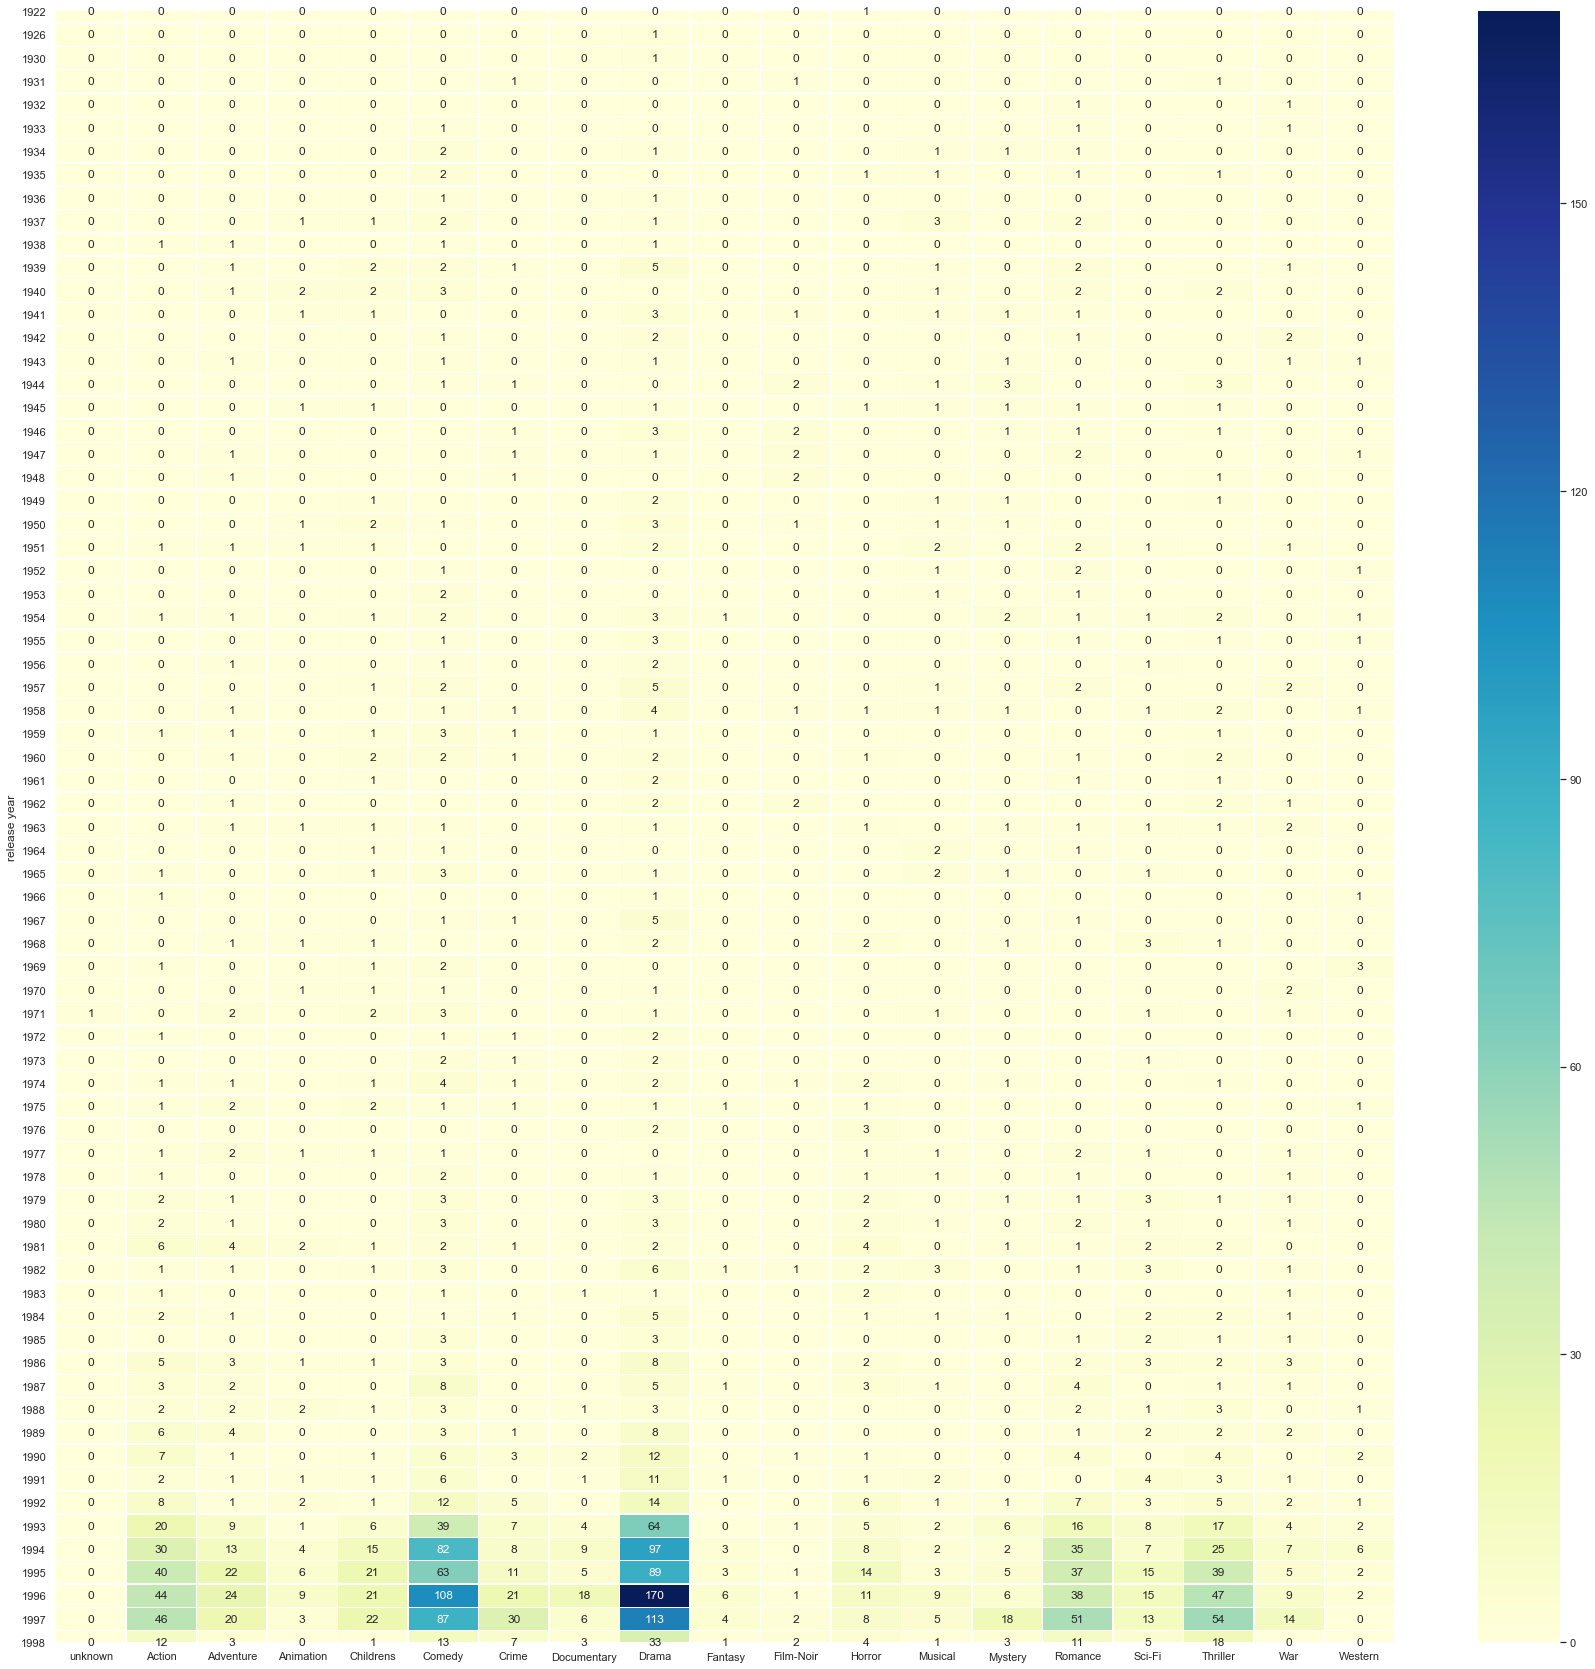

In [133]:
plt.figure(figsize=(30,30))
sns.heatmap(dfpopularityGenre, annot=True, fmt="d",linewidths=.5,cmap="YlGnBu")
#Drama,Comedy,Thriller and ACtion are popular in the order

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [193]:
#your answer here
dftop25MovieRating=df_data.groupby('movie id')['rating'].count().sort_values(ascending=False).head(25)
dftop25MovieRatingDF =pd.DataFrame(dftop25MovieRating)

In [194]:
dftop25MovieRatingDF.head()

,rating
movie id,
50,583
258,509
100,508
181,507
294,485


In [195]:
df_movieWithRating=df_item.join(dftop25MovieRatingDF, on='movie id',how='inner')

In [200]:
df_movieWithRating[['movie id','movie title','rating']].sort_values(by='rating',ascending=False).reset_index(drop=True)

,movie id,movie title,rating
0,50,Star Wars,583
1,258,Contact,509
2,100,Fargo,508
3,181,Return of the Jedi,507
4,294,Liar Liar,485
5,286,"English Patient, The",481
6,288,Scream,478
7,1,Toy Story,452
8,300,Air Force One,431
9,121,Independence Day (ID4),429


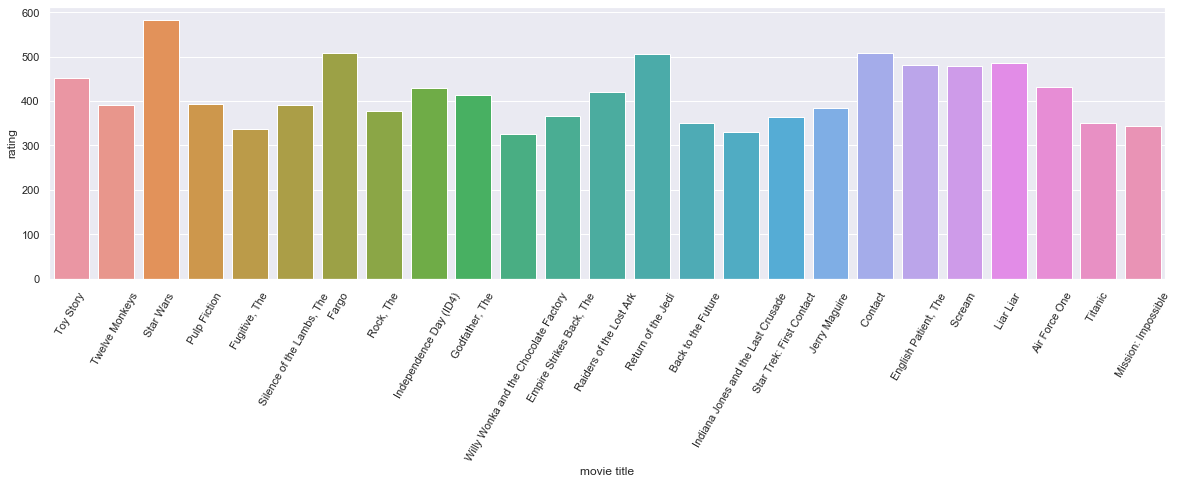

In [208]:
plt.figure(figsize=(20,5))
g=sns.barplot(x='movie title',y='rating',data=df_movieWithRating)
var=g.set_xticklabels(labels=df_movieWithRating['movie title'],rotation=60)

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [256]:
df_item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [ ]:
#For Drama Movies**************************************************************************

In [220]:
df_drama_movies=df_item.loc[df_item['Drama']==1,['movie id','movie title','Drama']]
df_drama_movies.head()

,movie id,movie title,Drama
3,4,Get Shorty,1
4,5,Copycat,1
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),1
6,7,Twelve Monkeys,1
7,8,Babe,1


In [224]:
df_data.shape

(100000, 4)

In [228]:
df_dramaMovieWithRating=df_drama_movies.merge(df_data, left_on='movie id', right_on='movie id',how="inner", suffixes=(False, False))
df_dramaMovieWithRating

,movie id,movie title,Drama,user id,rating,timestamp
0,4,Get Shorty,1,99,5,886519097
1,4,Get Shorty,1,19,4,885412840
2,4,Get Shorty,1,194,4,879521397
3,4,Get Shorty,1,207,4,876198457
4,4,Get Shorty,1,62,4,879374640
...,...,...,...,...,...,...
39890,1676,"War at Home, The",1,851,2,875731674
39891,1677,Sweet Nothing,1,854,3,882814368
39892,1678,Mat' i syn,1,863,1,889289570
39893,1680,Sliding Doors,1,863,2,889289570


In [231]:
df_dramaMovieWithRatingAndUSer=df_dramaMovieWithRating.merge(df_user,left_on="user id",right_on="user id",how="inner",suffixes=(False,False))

In [269]:
df_DramagenderBasedRatingCount=df_dramaMovieWithRatingAndUSer.groupby('gender')['rating'].count()
df_DramagenderBasedRatingCountDataFrame=pd.DataFrame(df_genderBasedRatingCount)


In [270]:
df_DramagenderBasedRatingCountDataFrame=df_DramagenderBasedRatingCountDataFrame.reset_index()


In [271]:
df_DramagenderBasedRatingCountDataFrame['percentage']=(df_DramagenderBasedRatingCountDataFrame['rating']/(df_DramagenderBasedRatingCountDataFrame['rating'].sum()))*100

In [272]:
df_DramagenderBasedRatingCountDataFrame

,gender,rating,percentage
0,F,11008,27.59243
1,M,28887,72.40757


In [257]:
#For SCi-fi Movies**************************************************************************

In [258]:
df_Scifi_movies=df_item.loc[df_item['Sci-Fi']==1,['movie id','movie title','Sci-Fi']]
df_Scifi_moviesWithRating=df_Scifi_movies.merge(df_data, left_on='movie id', right_on='movie id',how="inner", suffixes=(False, False))
df_Scifi_moviesWithRatingAndUSer=df_Scifi_moviesWithRating.merge(df_user,left_on="user id",right_on="user id",how="inner",suffixes=(False,False))
df_ScifigenderBasedRatingCount=df_Scifi_moviesWithRatingAndUSer.groupby('gender')['rating'].count()
df_ScifigenderBasedRatingCountDataFrame=pd.DataFrame(df_ScifigenderBasedRatingCount)
df_ScifigenderBasedRatingCountDataFrame=df_ScifigenderBasedRatingCountDataFrame.reset_index()
df_ScifigenderBasedRatingCountDataFrame['percentage']=(df_ScifigenderBasedRatingCountDataFrame['rating']/(df_ScifigenderBasedRatingCountDataFrame['rating'].sum()))*100

In [273]:
df_ScifigenderBasedRatingCountDataFrame

,gender,rating,percentage
0,F,2629,20.652003
1,M,10101,79.347997


In [ ]:
#For Romantic Movies**************************************************************************

In [268]:
df_Romance_movies=df_item.loc[df_item['Romance']==1,['movie id','movie title','Romance']]
df_Romance_moviesWithRating=df_Romance_movies.merge(df_data, left_on='movie id', right_on='movie id',how="inner", suffixes=(False, False))
df_Romance_moviesWithRatingAndUSer=df_Romance_moviesWithRating.merge(df_user,left_on="user id",right_on="user id",how="inner",suffixes=(False,False))
df_RomancegenderBasedRatingCount=df_Romance_moviesWithRatingAndUSer.groupby('gender')['rating'].count()
df_RomancegenderBasedRatingCountDataFrame=pd.DataFrame(df_RomancegenderBasedRatingCount)
df_RomancegenderBasedRatingCountDataFrame=df_RomancegenderBasedRatingCountDataFrame.reset_index()
df_RomancegenderBasedRatingCountDataFrame['percentage']=(df_RomancegenderBasedRatingCountDataFrame['rating']/(df_RomancegenderBasedRatingCountDataFrame['rating'].sum()))*100
df_RomancegenderBasedRatingCountDataFrame

,gender,rating,percentage
0,F,5858,30.101228
1,M,13603,69.898772


In [ ]:
#Male watch more Drama,Scifi and Romantic movies than man